In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
Mainset = pd.read_csv('/Datasets/netflix1.csv')

In [4]:
Mainset.shape

(8790, 10)

In [5]:
Mainset.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
Mainset.duplicated().sum()

np.int64(0)

In [7]:
Mainset.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [8]:
Mainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [9]:
Mainset['date_added'] = pd.to_datetime(Mainset['date_added'])

In [10]:
Mainset.rename(columns={'date_added':'date'},inplace=True)

In [11]:
Mainset[Mainset['director'].str.contains("not given",case=False)]

,show_id,type,title,director,country,date,release_year,rating,duration,listed_in
12,s852,Movie,99 Songs (Tamil),Not Given,Pakistan,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
33,s20,TV Show,Jaguar,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh..."
34,s32,TV Show,Chicago Party Aunt,Not Given,Pakistan,2021-09-17,2021,TV-MA,1 Season,TV Comedies
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [12]:
Mainset['release_year'] = pd.to_numeric(Mainset['release_year'])

In [13]:
df = Mainset

In [14]:
df['type'].value_counts().reset_index()

,type,count
0,Movie,6126
1,TV Show,2664


In [ ]:
# Season_show = df[df['duration'].str.contains('season',case=False)]
df.loc[df['duration'].str.contains('season',case=False),'title']

1                             Ganglands
2                         Midnight Mass
5         The Great British Baking Show
17                Jailbirds New Orleans
18      Crime Stories: India Detectives
                     ...               
8785                         Yunus Emre
8786                          Zak Storm
8787                 Zindagi Gulzar Hai
8788                               Yoko
8789                                YOM
Name: title, Length: 2664, dtype: object

In [16]:

M1 = pd.DataFrame(df['duration'].str.contains('season',case=False).value_counts())
M1

,count
duration,
False,6126
True,2664


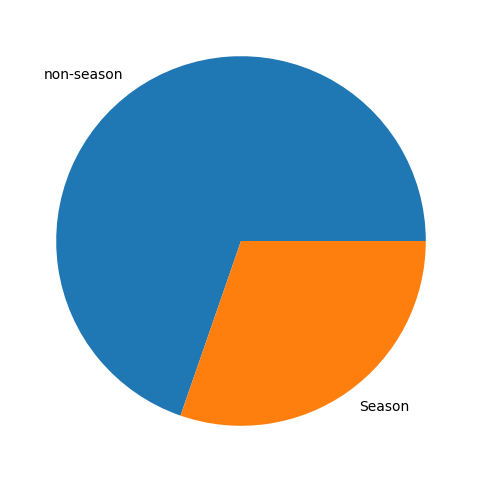

In [17]:
plt.figure(figsize=(20,6))
plt.pie(M1['count'], labels=['non-season','Season'])
plt.show()

In [18]:
dl = df['director'].value_counts().sort_values(ascending=False)
fdl = pd.DataFrame((dl[df['director'].value_counts().sort_values(ascending=False)<30]))


In [23]:
pdf = fdl[fdl['count']>10]


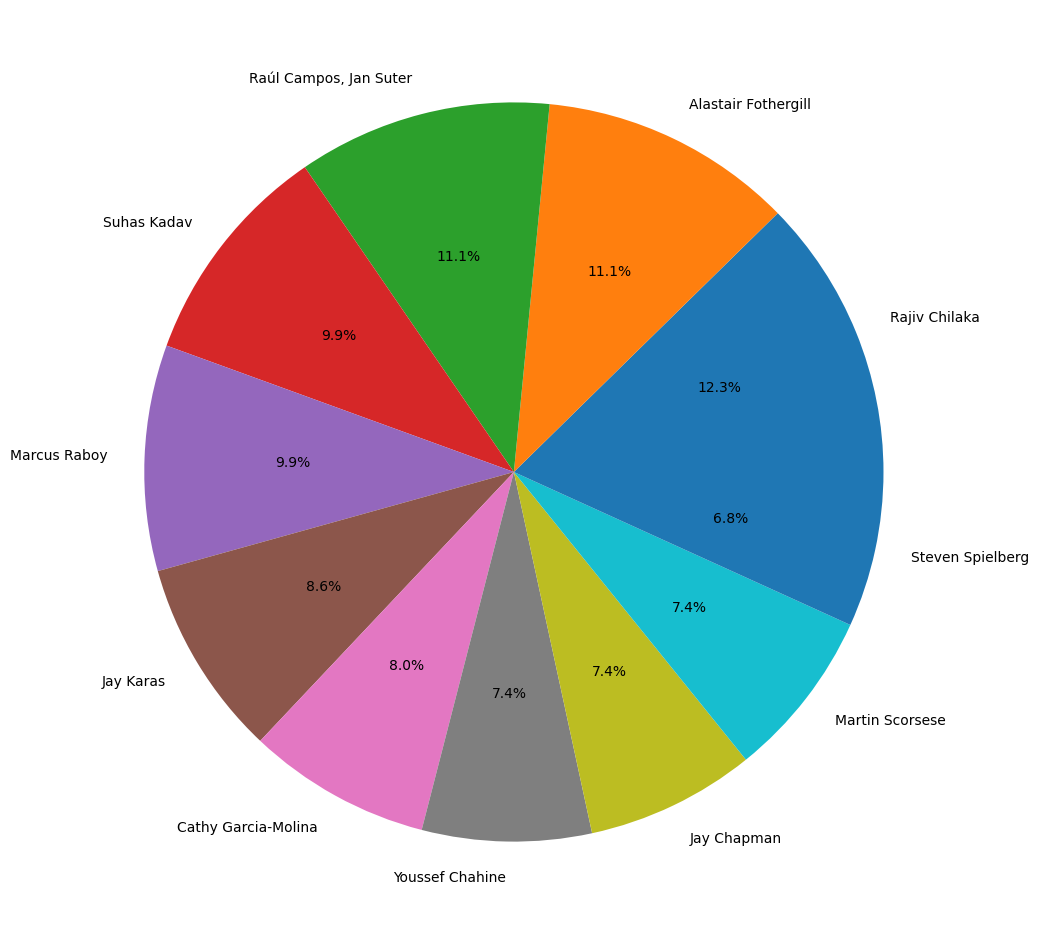

In [28]:
plt.figure(figsize=(40,12))
plt.pie(pdf['count'],labels=pdf.index ,autopct='%1.1f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

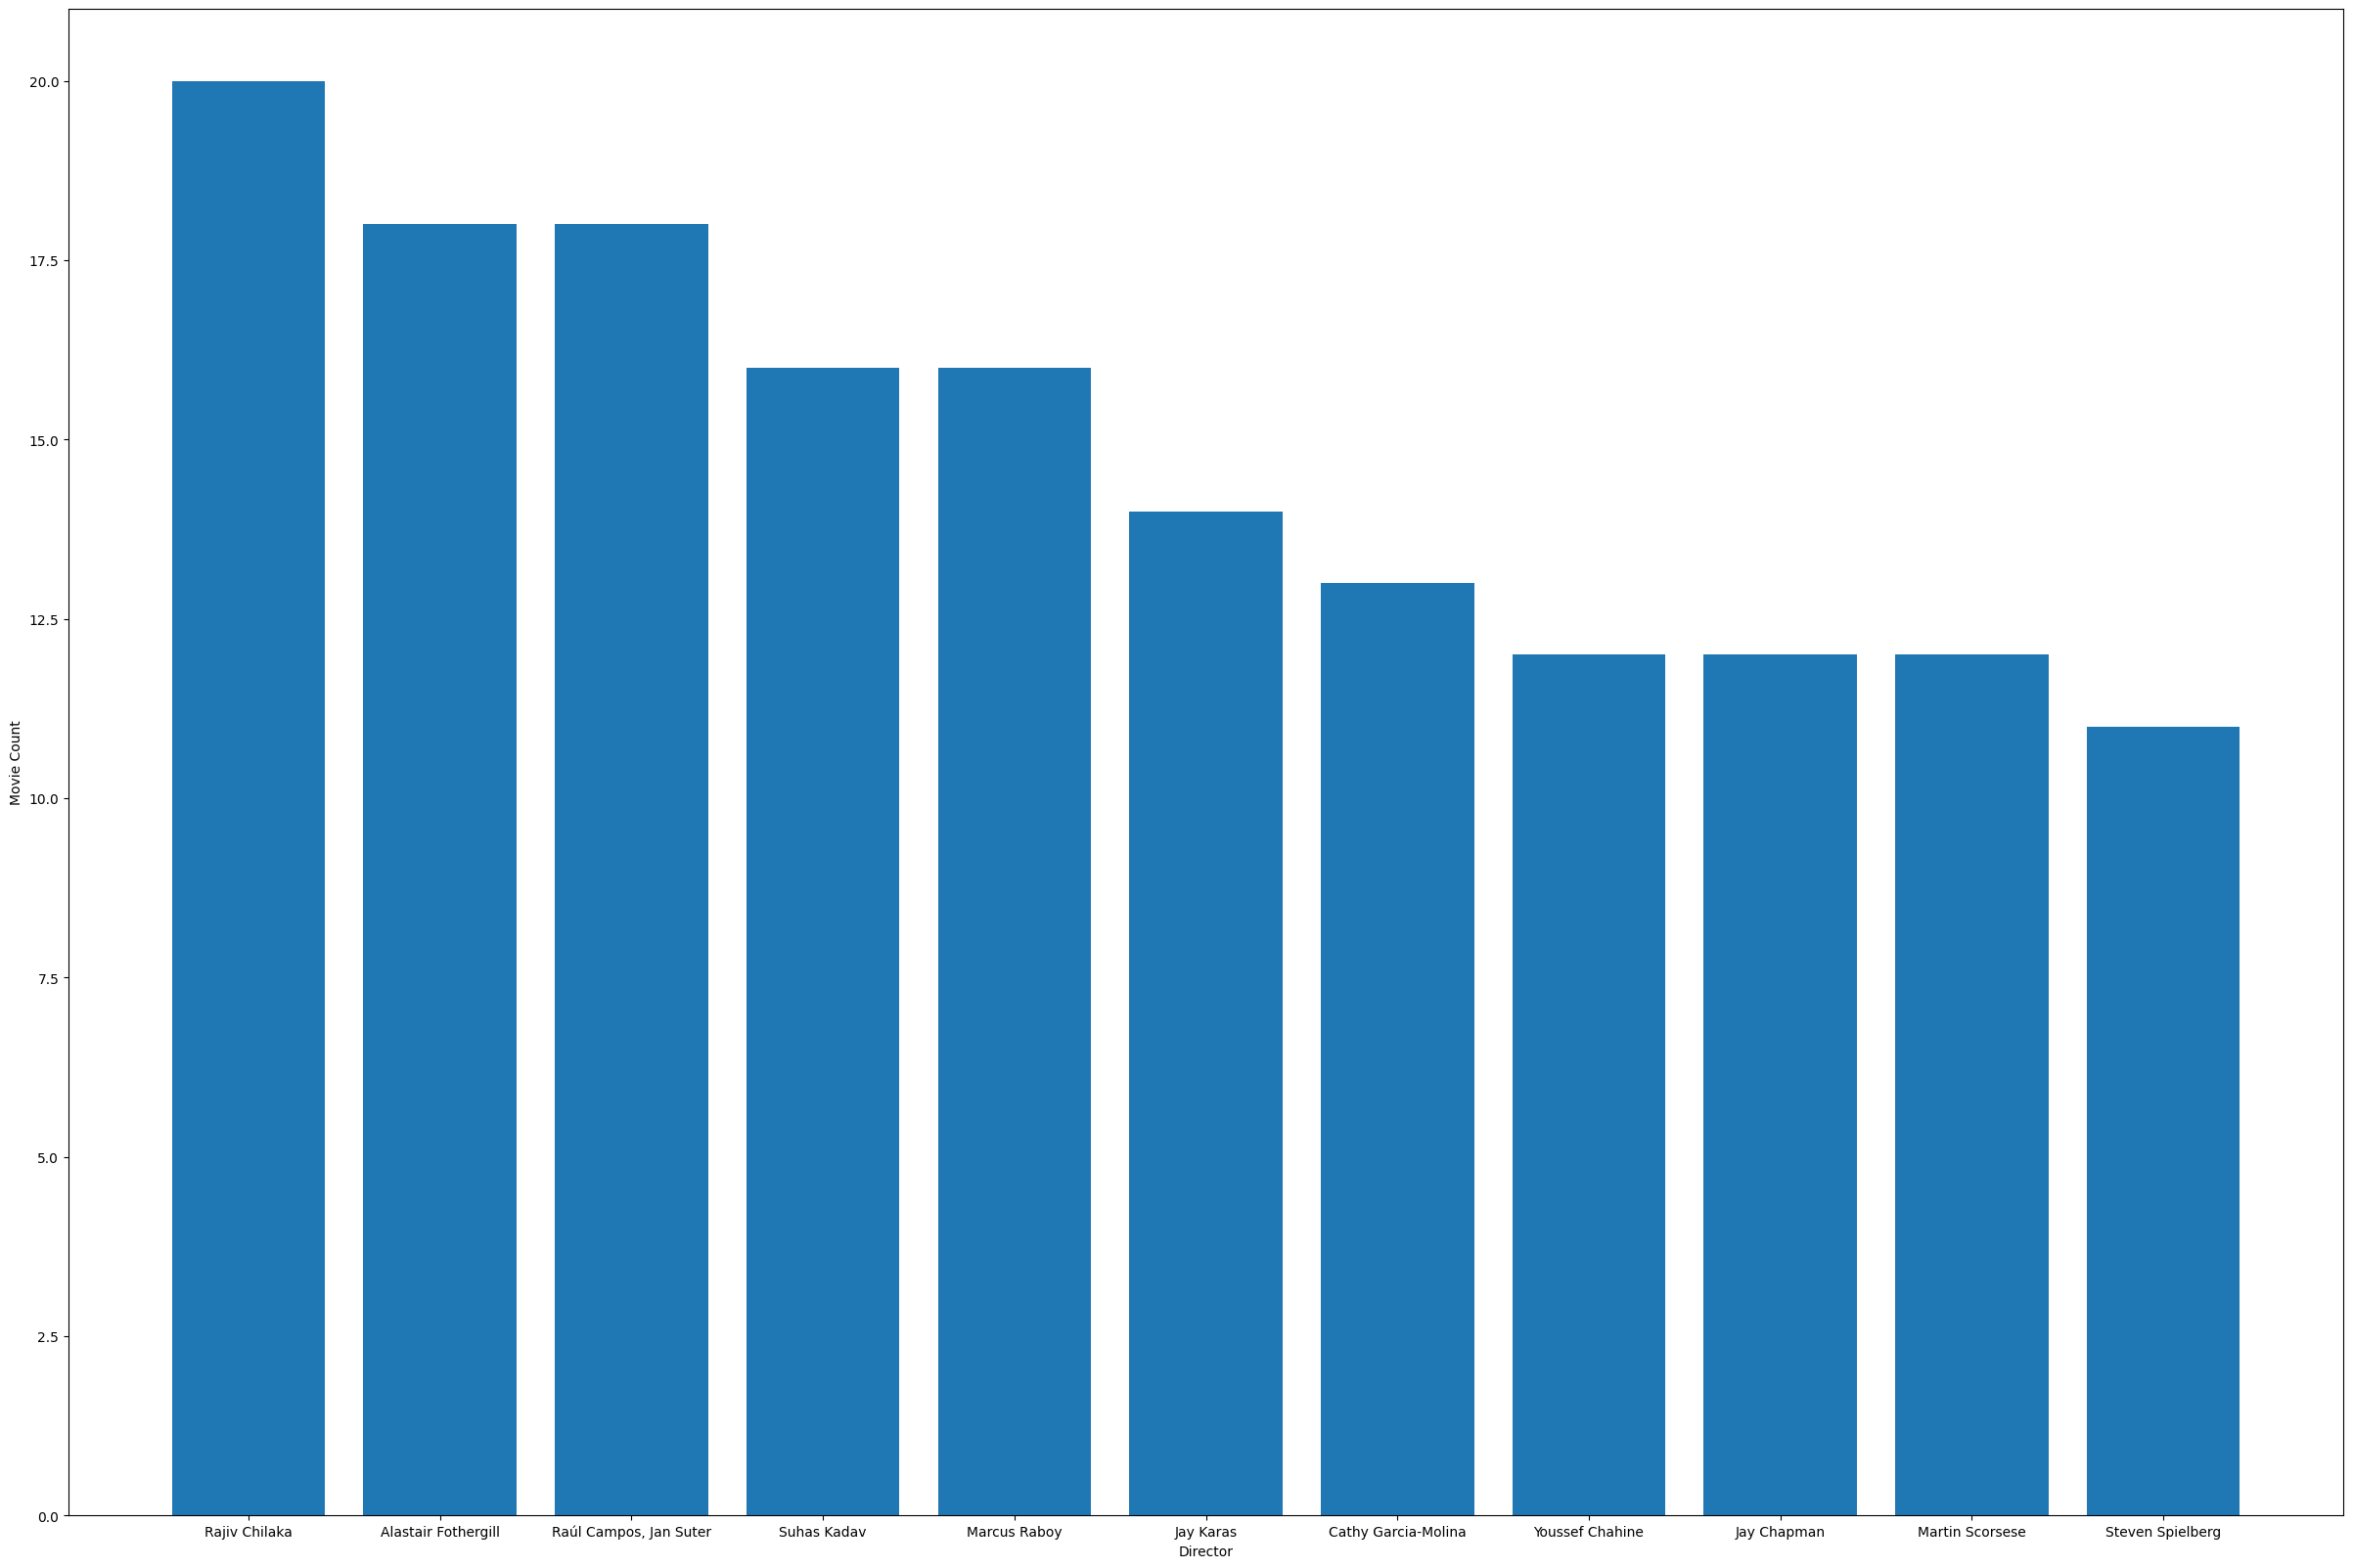

In [37]:
plt.figure(figsize=(30,20))
plt.bar(pdf.index,pdf['count'])
plt.title('')
plt.xlabel('Director')
plt.ylabel('Movie Count')
plt.show

In [64]:
Count_count =df['country'].value_counts()
Count_count.pop('Not Given')
Count_count=pd.DataFrame(Count_count)
# Count_count=Count_count[~(Count_count<2)].groupby(Count_count)

In [80]:
Count_count.loc[Count_count['count']>99,'count']

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Egypt              123
Australia          114
Turkey             112
Nigeria            105
Germany            104
China              100
Name: count, dtype: int64

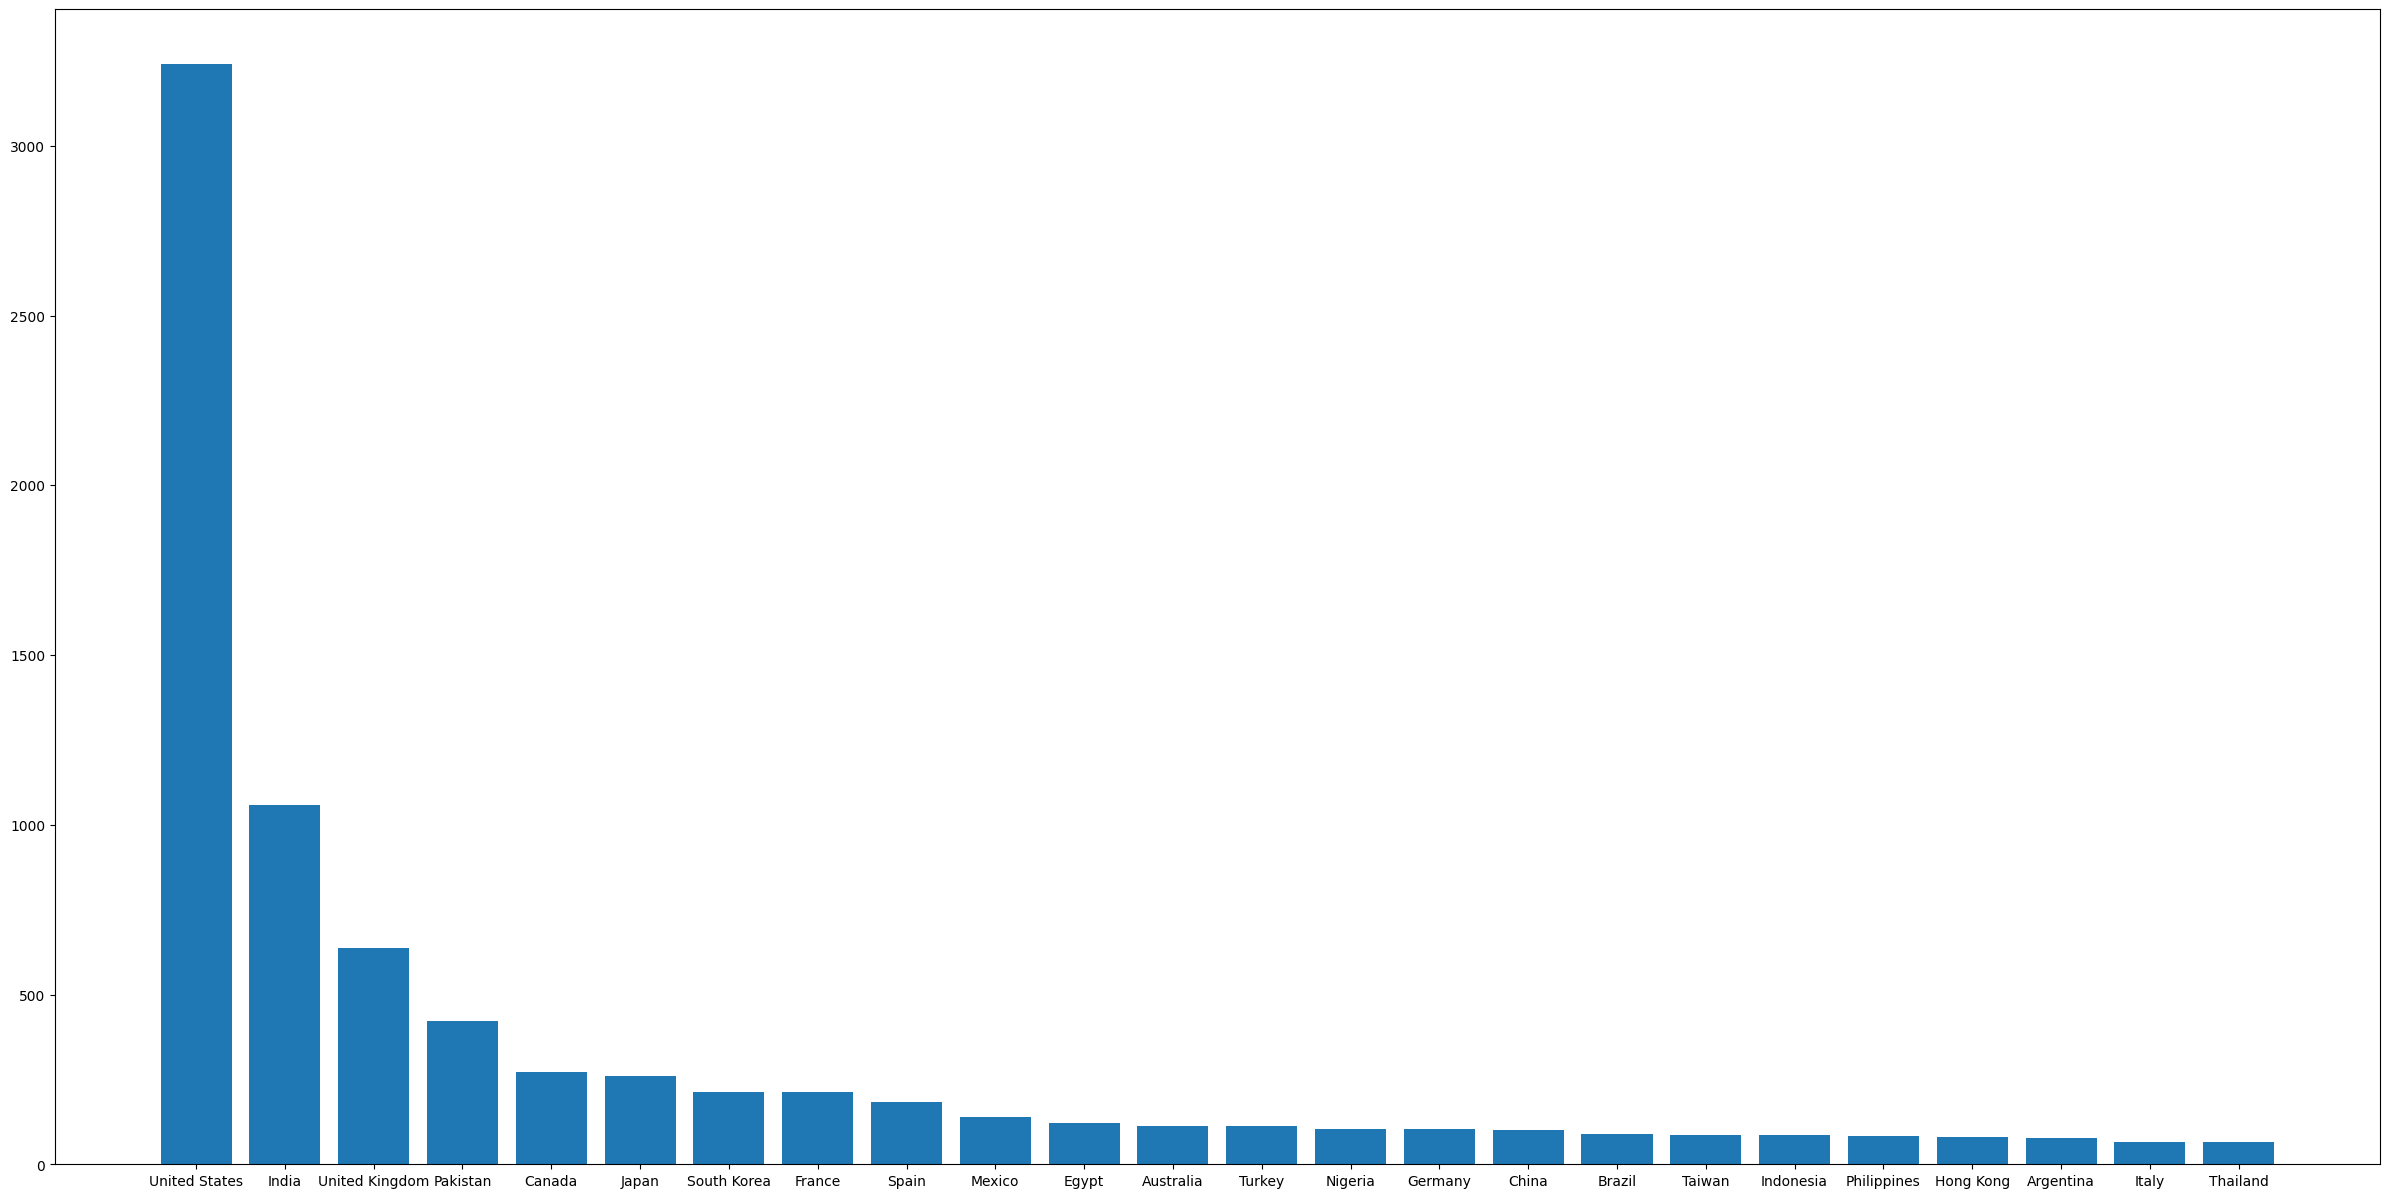

In [81]:
plt.figure(figsize=(30,15))
plt.bar(Count_count.loc[Count_count['count']>50,'count'].index,Count_count.loc[Count_count['count']>50,'count'])
plt.show()